In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

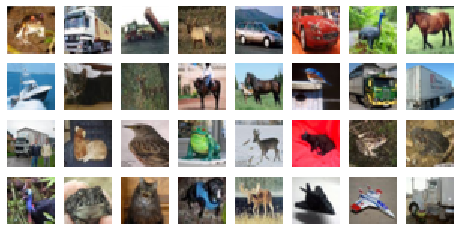

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [5]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

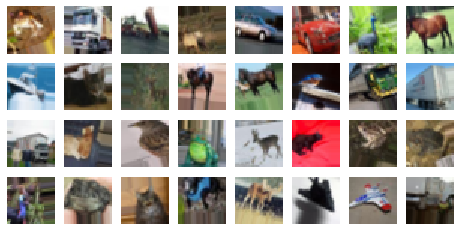

In [6]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int 

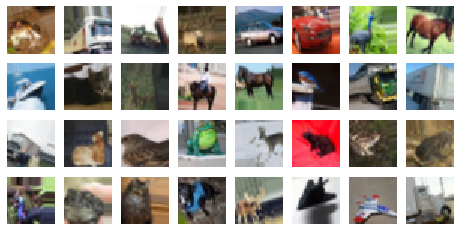

In [7]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [8]:
batch_size = 128
num_classes = 10
epochs = 10

In [9]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)      

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 70s 1ms/step - loss: 1.6196 - accuracy: 0.4066 - val_loss: 1.2779 - val_accuracy: 0.5364
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.2324 - accuracy: 0.5625 - val_loss: 1.0399 - val_accuracy: 0.6312
Epoch 3/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.0517 - accuracy: 0.6271 - val_loss: 0.9706 - val_accuracy: 0.6618
Epoch 4/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.9511 - accuracy: 0.6676 - val_loss: 0.8417 - val_accuracy: 0.7068
Epoch 5/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.8673 - accuracy: 0.6972 - val_loss: 0.7807 - val_accuracy: 0.7286
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.7995 - accuracy: 0.7194 - val_loss: 0.7609 - val_accuracy: 0.7354
Epoch 7/10
50000/50000 [==============================] - 68s 1ms/s

In [13]:
train_gen = data_generator.flow(x_train, y_train, batch_size=batch_size, shuffle=True)

history = model.fit_generator(train_gen,
                    steps_per_epoch=int(len(x_train)/batch_size),
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
390/390 [==============================] - 70s 179ms/step - loss: 1.1475 - accuracy: 0.5969 - val_loss: 0.8907 - val_accuracy: 0.6857
Epoch 2/10
390/390 [==============================] - 70s 180ms/step - loss: 1.0736 - accuracy: 0.6212 - val_loss: 0.7847 - val_accuracy: 0.7311
Epoch 3/10
390/390 [==============================] - 69s 176ms/step - loss: 1.0359 - accuracy: 0.6366 - val_loss: 0.8016 - val_accuracy: 0.7240
Epoch 4/10
390/390 [==============================] - 69s 178ms/step - loss: 1.0159 - accuracy: 0.6449 - val_loss: 0.8555 - val_accuracy: 0.7119
Epoch 5/10
390/390 [==============================] - 69s 177ms/step - loss: 0.9978 - accuracy: 0.6520 - val_loss: 0.8090 - val_accuracy: 0.7217
Epoch 6/10
390/390 [==============================] - 69s 176ms/step - loss: 0.9788 - accuracy: 0.6567 - val_loss: 0.8019 - val_accuracy: 0.7217
Epoch 7/10
390/390 [==============================] - 69s 177ms/step - loss: 0.9661 - accuracy: 0.6644 - val_loss: 0.7968 - val_ac